# Data import and EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import Data_Eng_Functions as ff

In [3]:
winds = px.data.wind()

In [4]:
winds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   direction  128 non-null    object 
 1   strength   128 non-null    object 
 2   frequency  128 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


In [5]:
winds.head()

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4


In [6]:
wind_direction = winds["direction"]
wind_direction_numeric = ff.transform_wind_directions_to_numeric(wind_direction)
print(wind_direction_numeric)

[0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5, 0, 22.5, 45, 67.5, 90, 111.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5]


In [7]:
winds.tail()

,direction,strength,frequency
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5
127,NNW,6+,0.2


In [8]:
wind_strength = winds["strength"]
print(wind_strength)

0      0-1
1      0-1
2      0-1
3      0-1
4      0-1
      ... 
123     6+
124     6+
125     6+
126     6+
127     6+
Name: strength, Length: 128, dtype: object


In [9]:
formatted_wind_list = []
for item in wind_strength:
    if "-" in item:
        wind_formatted = int(item.split("-")[0])
        
    elif "+" in item:
        wind_formatted = int(item.split("+")[0])
   
    formatted_wind_list.append(wind_formatted)
print(formatted_wind_list)
print(len(formatted_wind_list))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
128


In [10]:
winds["direction"] = wind_direction_numeric
winds["strength"] = formatted_wind_list
winds.head()
winds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   direction  128 non-null    float64
 1   strength   128 non-null    int64  
 2   frequency  128 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [11]:
winds['Avg_Strength'] = winds.groupby(by='direction')['strength'].transform('mean')
winds['Avg_Frequency'] = winds.groupby(by='direction')['frequency'].transform('mean')
winds.head()

,direction,strength,frequency,Avg_Strength,Avg_Frequency
0,0.0,0,0.5,3.125,0.6125
1,22.5,0,0.6,3.125,0.6875
2,45.0,0,0.5,3.125,0.8500
3,67.5,0,0.4,3.125,0.6000
4,90.0,0,0.4,3.125,0.5625


# Subplots in Matplotlib pyplot

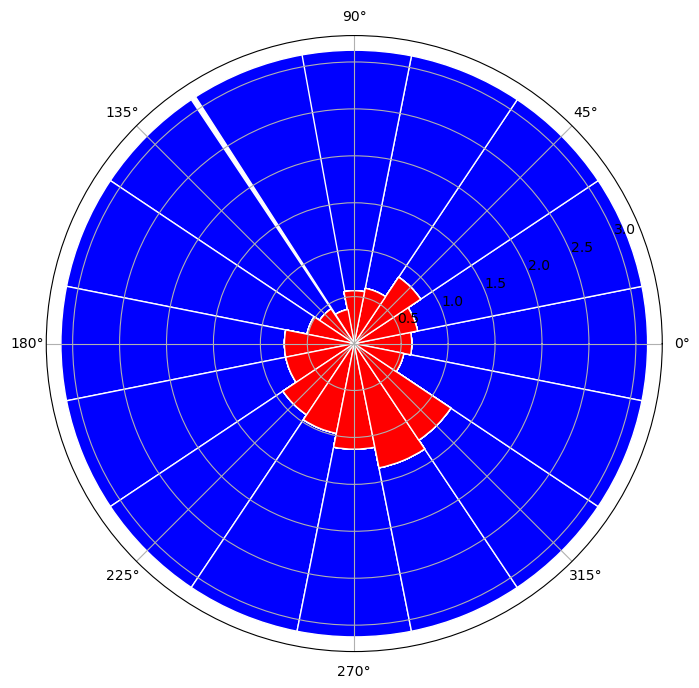

In [12]:
n_directions = 16 
theta = np.deg2rad(winds["direction"]) 
width = 2*np.pi / n_directions
matplot_fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.bar(
    theta,
    height=winds["Avg_Strength"],
    width=width,
    bottom=0,
    color="blue",
    edgecolor="white",
    linewidth=1
)
ax.bar(
    theta,
    height=winds["Avg_Frequency"],
    width=width,
    bottom=0,
    color="red",
    edgecolor="white",
    linewidth=1
)
ax.grid(True, 'both')
plt.axis("on")
plt.show()

# Dataframe for electricity prices based on HTML-files

In [14]:
data_folder = r"C:/Users/Dell/Desktop/Lecture_7_11_2022/mywork/Electric_prices_data"

df = ff.parseHTMLfiles(data_folder)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 3792 to 695
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23040 non-null  datetime64[ns]
 1   Price   23040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 540.0 KB


In [15]:
df.head()

,Date,Price
3792,2020-03-06 00:00:00,1.70624
3793,2020-03-06 01:00:00,1.91456
3794,2020-03-06 02:00:00,1.85504
3795,2020-03-06 03:00:00,1.85876
3796,2020-03-06 04:00:00,1.89472


# Estimate average prices for the whole timeline, monthly average prices, and weekly average prices

In [16]:
average = df['Price'].mean()
monthly = df.groupby(pd.Grouper(key='Date', freq='M')).transform('mean')
weekly = df.groupby(pd.Grouper(key='Date', freq='W')).transform('mean') 

daily_volatility = df.groupby(pd.Grouper(key='Date', freq='D')).transform('std') 
df["daily_volatility"] = daily_volatility

<AxesSubplot:xlabel='daily_volatility', ylabel='Price'>

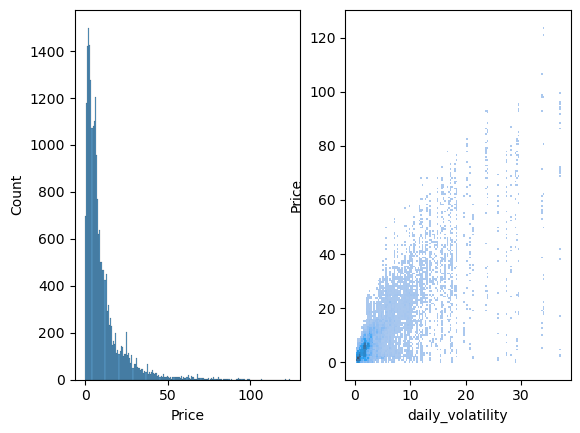

In [17]:
sns_fig, [ax1, ax2] = plt.subplots(1,2)
sns.histplot(df['Price'], ax=ax1)
sns.histplot(df, x="daily_volatility", y='Price', ax=ax2)

# Dashboard of daily volatility and prices

In [18]:
from dash import dcc, html
from jupyter_dash import JupyterDash
import plotly.express as px
import plotly.tools
from markupsafe import escape

figures = []

fig = px.line(df, x='Date', y='Price',
                        title="NordPoolSpot Prices s/KWh", hover_data=['Price', 'Date'],
                        hover_name="Price", 
                       color_discrete_map={ "Price": "blue"})
fig.update_traces(opacity=0.2)
fig.data[-1].name = 'Spot'
fig.data[-1].showlegend = True

fig.add_hline(average, annotation_text="Avg:"+str(np.round(average, 2)), annotation_position='left')
fig.add_scatter(x=df['Date'], y=monthly['Price'], line={'color': 'red'})

fig.data[-1].name = 'Monthly'
fig.data[-1].showlegend = True

fig.add_scatter(x=df['Date'], y=weekly['Price'], line={'color': 'green'})

fig.data[-1].name = 'Weekly'
fig.data[-1].showlegend = True


fig_stat = px.line(df, x="Date", y="daily_volatility")
fig_stat.data[-1].name = 'Daily volatility or std'
fig_stat.data[-1].showlegend = True

figures.append(dcc.Graph(figure=fig, id='Prices'))
figures.append(dcc.Graph(figure=fig_stat))
app = JupyterDash(__name__)

app.layout = html.Div(figures)

app.run_server(mode='jupyterlab', debug=False, use_reloader=False, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True, port = 8000)

 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [30/Dec/2022 23:03:41] "GET /_alive_467b0000-e234-4f6a-a25e-f2da262a30e7 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:42] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:42] "GET /_favicon.ico?v=2.7.1 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:44] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:44] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [30/Dec/2022 23:03:44] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [30/Dec/2022 23:03:44] "GET /cart.json HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:46] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:46] "GET /_favicon.ico?v=2.7.1 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:48] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2022 23:03:51] "GET 